Massive open online courses (MOOCSs) are free online courses open for everyone to enroll. What Makes MOOCs attractive is the fact that it offers opportunities for people from different walks of life and from differen countries to study "together" and by together that is virtually, at minimal to no cost to students. Schools like University of Maryland University College were among the first univeristies to accept MOOCs for credit, since then more institutions have welcomed the idea of providing online education for free. MOOCs sadly have simply not lived up to their mission to transform education around the world and once again we see how a good free initiative simply does not translate to good results.

In [1]:
#Import libraries and dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import sklearn

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.notebook_repr_html',True)
pd.set_option('display.float_format', lambda x: '%.0f' % x)

## Read in the datasets

In [3]:
#First dataset
mooc_data = pd.read_csv('mooc.csv')
mooc_data.head()

,course_id,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,start_time_DI,last_event_DI,nevents,ndays_act,nplay_video,nchapters,nforum_posts,roles,incomplete_flag
0,HarvardX/CB22x/2013_Spring,MHxPC130442623,1,0,0,0,United States,NaN,nan,NaN,0,12/19/2012,11/17/2013,nan,9,nan,nan,0,nan,1
1,HarvardX/CB22x/2013_Spring,MHxPC130275857,1,0,0,0,United States,NaN,nan,NaN,0,2/8/2013,11/17/2013,nan,16,nan,nan,0,nan,1
2,HarvardX/CB22x/2013_Spring,MHxPC130539455,1,1,0,0,France,NaN,nan,NaN,0,1/1/2013,5/14/2013,42,6,nan,3,0,nan,nan
3,HarvardX/CB22x/2013_Spring,MHxPC130088379,1,1,0,0,United States,NaN,nan,NaN,0,2/18/2013,3/17/2013,70,3,nan,3,0,nan,nan
4,HarvardX/CB22x/2013_Spring,MHxPC130024894,1,1,0,0,United States,NaN,nan,NaN,0.07,1/24/2013,8/3/2013,175,9,nan,7,0,nan,nan


## Data Preprocessing

In [4]:
#split course id and extract institution, course id, year and semester from it
course_details = [course for course in mooc_data['course_id']]

institution= []
course_id= []
year= []

for course in course_details:
    course = course.split('/')
    institution.append(course[0])
    course_id.append(course[1])
    year.append(course[2])        

In [5]:
#Add the newly created lists to the existing dataframe
mooc_data['Institution'] = institution
mooc_data['Course_id'] =  course_id
mooc_data['Year'] = year

#drop unmwanted and duplicate columns from the dataframe
mooc_data = mooc_data.drop(columns=["course_id","roles"])

In [6]:
#Extract semester and year from the year column
seasons = [yr for yr in mooc_data['Year']]
semester = []
year = []
for season in seasons:
    season = season.split('_')
    year.append(season[0])
    if len(season) > 1:
        semester.append(season[1])
    elif len(season) == 1:
        semester.append('N/A')

In [7]:
mooc_data['Year'] = year
mooc_data['Semester'] = semester

In [8]:
#rename all null values as N/A to easily drop them
mooc_data = mooc_data.fillna('N/A')

In [9]:
#Remove rows from columns gender, level of education, Year of birth with N/A
mooc_data = mooc_data.loc[mooc_data['gender'] != 'N/A']
mooc_data = mooc_data.loc[mooc_data['LoE_DI'] != 'N/A']  
mooc_data = mooc_data.loc[mooc_data['YoB'] != 'N/A']

# replace numeric null values  with 0
mooc_data.loc[mooc_data['nevents'] == 'N/A', 'nevents'] = 0
mooc_data.loc[mooc_data['ndays_act'] == 'N/A', 'ndays_act'] = 0
mooc_data.loc[mooc_data['nplay_video'] == 'N/A', 'nplay_video'] = 0
mooc_data.loc[mooc_data['nchapters'] == 'N/A', 'nchapters'] = 0
mooc_data.loc[mooc_data['grade'] == 'N/A', 'grade'] = 0
mooc_data.loc[mooc_data['incomplete_flag'] == 'N/A', 'incomplete_flag'] = 0

In [10]:
mooc_data.head()

,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,nevents,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,Institution,Course_id,Year,Semester
1880,MHxPC130069875,1,1,0,0,India,Secondary,1994,m,0,...,26,4,0,3,0,0,HarvardX,CB22x,2013,Spring
1881,MHxPC130114587,1,1,0,0,Other South America,Bachelor's,1990,m,0,...,44,4,0,2,0,0,HarvardX,CB22x,2013,Spring
1882,MHxPC130122866,1,1,0,0,Other Europe,Master's,1978,m,0,...,32,1,0,2,0,0,HarvardX,CB22x,2013,Spring
1883,MHxPC130470188,1,0,0,0,Other East Asia,Bachelor's,1983,m,0,...,0,2,0,0,0,1,HarvardX,CB22x,2013,Spring
1884,MHxPC130263156,1,1,0,0,Other Europe,Master's,1977,m,0,...,37,2,0,1,0,0,HarvardX,CB22x,2013,Spring


In [11]:
#Calculate age from year column up to 2013 
mooc_data['Age'] = pd.Timestamp('2013').year - mooc_data['YoB'] 
mooc_data.head()

,userid_DI,registered,viewed,explored,certified,final_cc_cname_DI,LoE_DI,YoB,gender,grade,...,ndays_act,nplay_video,nchapters,nforum_posts,incomplete_flag,Institution,Course_id,Year,Semester,Age
1880,MHxPC130069875,1,1,0,0,India,Secondary,1994,m,0,...,4,0,3,0,0,HarvardX,CB22x,2013,Spring,19
1881,MHxPC130114587,1,1,0,0,Other South America,Bachelor's,1990,m,0,...,4,0,2,0,0,HarvardX,CB22x,2013,Spring,23
1882,MHxPC130122866,1,1,0,0,Other Europe,Master's,1978,m,0,...,1,0,2,0,0,HarvardX,CB22x,2013,Spring,35
1883,MHxPC130470188,1,0,0,0,Other East Asia,Bachelor's,1983,m,0,...,2,0,0,0,1,HarvardX,CB22x,2013,Spring,30
1884,MHxPC130263156,1,1,0,0,Other Europe,Master's,1977,m,0,...,2,0,1,0,0,HarvardX,CB22x,2013,Spring,36


In [12]:
print(mooc_data.shape)
print(mooc_data.columns)
print(mooc_data.isnull().values.any())

(290948, 23)
Index(['userid_DI', 'registered', 'viewed', 'explored', 'certified',
       'final_cc_cname_DI', 'LoE_DI', 'YoB', 'gender', 'grade',
       'start_time_DI', 'last_event_DI', 'nevents', 'ndays_act', 'nplay_video',
       'nchapters', 'nforum_posts', 'incomplete_flag', 'Institution',
       'Course_id', 'Year', 'Semester', 'Age'],
      dtype='object')
False


### Adding Additional Columns to the dataframe

In [13]:
#Print out unique counts of course_ids in the dataframe
mooc_data['Course_id'].value_counts()

CS50x     143266
ER22x      49293
PH207x     37709
PH278x     35509
CB22x      25171
Name: Course_id, dtype: int64

In [14]:
#Add a new column called course title to the dataframe
mooc_data['Course_title'] = ''

mooc_data.loc[(mooc_data['Course_id'] == 'CB22x'), 'Course_title']= 'The Ancient Greek Hero'
mooc_data.loc[(mooc_data['Course_id'] == 'PH207x'), 'Course_title']= 'Health in Numbers'
mooc_data.loc[(mooc_data['Course_id'] == 'CS50x'), 'Course_title'] = 'Introduction to Computer Science'
mooc_data.loc[(mooc_data['Course_id'] == 'ER22x'), 'Course_title'] = 'Justice'
mooc_data.loc[(mooc_data['Course_id'] == 'PH278x'),'Course_title'] = 'Human Health and Global Environmental Change'

In [15]:
#Add a new column called course subject to the dataframe
mooc_data['Course_subject'] = ''

mooc_data.loc[(mooc_data['Course_id'] == 'CB22x') | (mooc_data['Course_id'] == 'ER22x'), 'Course_subject']= 'Humanities,History,Design,Religion,Education'
mooc_data.loc[(mooc_data['Course_id'] == 'PH207x') | (mooc_data['Course_id'] == 'PH278x'), 'Course_subject']= 'Government,Health,Social sciences'
mooc_data.loc[(mooc_data['Course_id'] == 'CS50x'), 'Course_subject'] = 'Computer Science'

In [16]:
#Reorganize and reorder columns
mooc_data = mooc_data[['userid_DI','Age','gender','final_cc_cname_DI','LoE_DI','Institution','Course_id','Course_title','Course_subject',\
             'Year','registered','viewed','explored','nplay_video','ndays_act','nchapters','nforum_posts','grade','incomplete_flag','certified']]

#Clean up column names
mooc_data.columns = ['Userid','Age','Gender','Country','Education','Institution','Course_id','Course_title','Course_subject',\
                    'Year','Registered','Viewed','Explored','Nplay_video','Ndays_act','Nchapters','Nforum_posts','Grade','Incomplete_flag','Certified']
mooc_data.head()

,Userid,Age,Gender,Country,Education,Institution,Course_id,Course_title,Course_subject,Year,Registered,Viewed,Explored,Nplay_video,Ndays_act,Nchapters,Nforum_posts,Grade,Incomplete_flag,Certified
1880,MHxPC130069875,19,m,India,Secondary,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,4,3,0,0,0,0
1881,MHxPC130114587,23,m,Other South America,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,4,2,0,0,0,0
1882,MHxPC130122866,35,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,1,2,0,0,0,0
1883,MHxPC130470188,30,m,Other East Asia,Bachelor's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,0,0,0,2,0,0,0,1,0
1884,MHxPC130263156,36,m,Other Europe,Master's,HarvardX,CB22x,The Ancient Greek Hero,"Humanities,History,Design,Religion,Education",2013,1,1,0,0,2,1,0,0,0,0


In [17]:
#Replace 0 and 1 with yes and no in yes or no columns
mooc_data["Certified"] = mooc_data["Certified"].replace({0: 'No', 1:'Yes'})
mooc_data["Explored"] = mooc_data["Explored"].replace({0: 'No', 1:'Yes'})
mooc_data["Registered"] = mooc_data["Explored"].replace({1:'Yes'})

In [18]:
#Summary of unique values in selected columns
users = len(mooc_data['Userid'].unique())
registrations = len(mooc_data['Registered'])
country = len(mooc_data['Country'].unique())
courses = len(mooc_data['Course_title'].unique())
education = len(mooc_data['Education'].unique())
age = len(mooc_data['Age'].unique())
gender = len(mooc_data['Gender'].unique())

df = pd.DataFrame({'Registrations': [registrations],
                   'Number of Userid': [users],
                   'Age':[age],
                   'Number of Countries': [country],
                   'Number of Courses': [courses],
                   'Level of Education':[education],
                   'Gender':[gender]})
df

,Registrations,Number of Userid,Age,Number of Countries,Number of Courses,Level of Education,Gender
0,290948,261151,78,34,5,5,3


## Analysis

In [19]:
#Registration by course title on edx
registered = mooc_data['Course_title'].value_counts()
registered = registered.reset_index()
registered.columns = ['Course title','Number of registrations']
registered

,Course title,Number of registrations
0,Introduction to Computer Science,143266
1,Justice,49293
2,Health in Numbers,37709
3,Human Health and Global Environmental Change,35509
4,The Ancient Greek Hero,25171


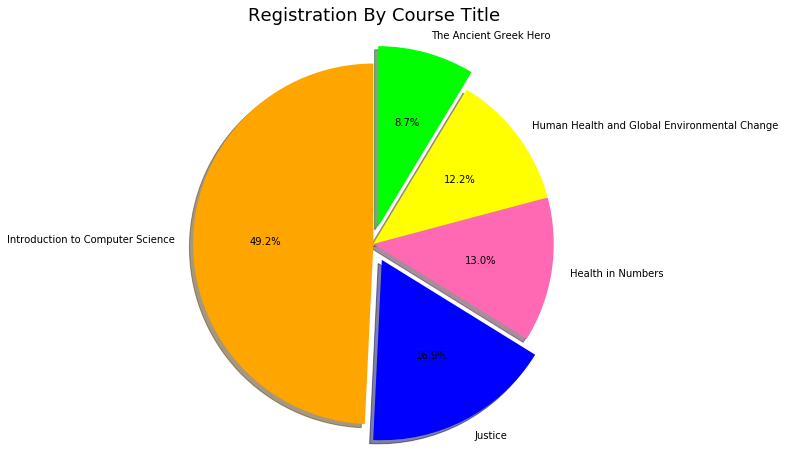

In [20]:
#PLot this data
plt.figure(figsize=(8,8))
colors =['orange','blue','hotpink','yellow','lime']
explode = (0.0,0.1,0.0,0.0,0.1)
plt.pie(registered['Number of registrations'], autopct='%1.1f%%',labels=registered['Course title'], colors=colors, \
        shadow=True, explode=explode, startangle=90)

plt.title('Registration By Course Title',fontsize=18)
plt.axis('equal')
plt.show()


In [21]:
#Number of males and females per course title
gender_registered = mooc_data.groupby(['Course_title','Gender']).count()['Registered']
g = gender_registered.reset_index()

males = g[g['Gender']=='m']
females = g[g['Gender']=='f']
gender_course = pd.merge(males,females, on=('Course_title'), how='inner', suffixes=('_male','_female'))
gender_course

,Course_title,Gender_male,Registered_male,Gender_female,Registered_female
0,Health in Numbers,m,21727,f,15982
1,Human Health and Global Environmental Change,m,18176,f,17333
2,Introduction to Computer Science,m,114850,f,28411
3,Justice,m,30028,f,19265
4,The Ancient Greek Hero,m,13765,f,11406


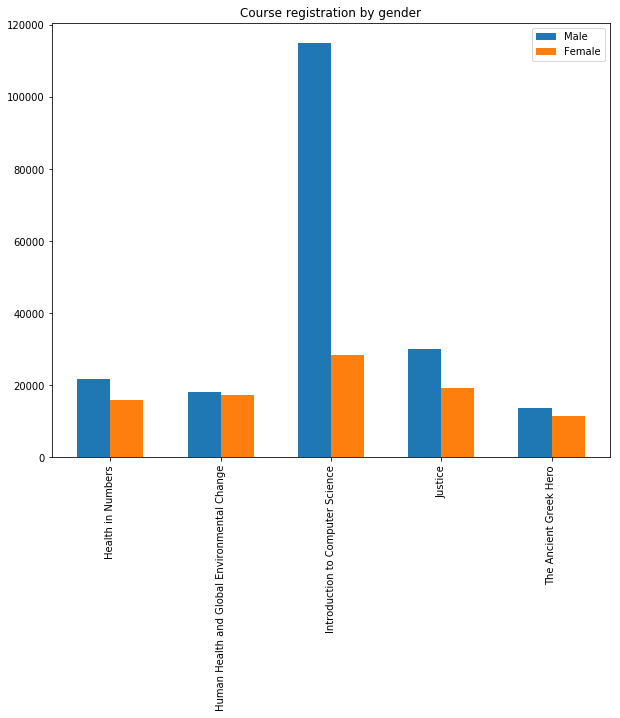

In [22]:
#Plot this data
fig, ax = plt.subplots(figsize=(10,8))

width = 0.30
labels = gender_course['Course_title']
x = np.arange(len(labels))

rects1 = ax.bar(x - width/2, males['Registered'], width, label='Male')
rects2 = ax.bar(x + width/2, females['Registered'], width, label='Female')
ax.set_title('Course registration by gender')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()
plt.show()

Out of the 290948 people who registered for these courses only 5728 were certified, an abysmal 2% of all total registrations received certifications

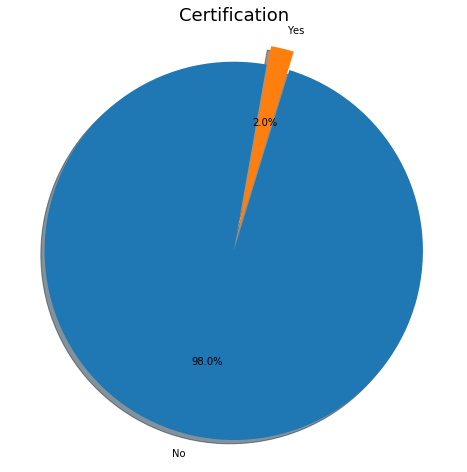

In [23]:
#Single out certification column 
df2 = mooc_data['Certified'].value_counts()
df2 = df2.reset_index()
df2

explode = (0, 0.1)
plt.figure(figsize=(8,8))
plt.pie(df2['Certified'], autopct='%1.1f%%', labels=df2['index'], explode=explode, shadow=True, startangle=80)
plt.title('Certification',fontsize=18)
plt.axis('equal')
plt.show()

### Certification analysis by demographics

In [24]:
#How many people were certified by gender,country of origin, level of education 
df = mooc_data[['Course_title','Registered','Certified','Education','Country']]

#Give me all courses in which students received certification
plot_df1 = df.loc[df['Certified'] =='Yes',['Course_title']]
plot_df1= plot_df1.value_counts().reset_index()
plot_df1.columns =['Course title','Number of certifications']
plot_df1 = pd.merge(registered, plot_df1, how='inner', on='Course title')
percent_certified = (plot_df1['Number of certifications'] / plot_df1['Number of registrations']) * 100
plot_df1['% certified'] = percent_certified
plot_df1

,Course title,Number of registrations,Number of certifications,% certified
0,Introduction to Computer Science,143266,1063,1
1,Justice,49293,1970,4
2,Health in Numbers,37709,1739,5
3,Human Health and Global Environmental Change,35509,635,2
4,The Ancient Greek Hero,25171,321,1


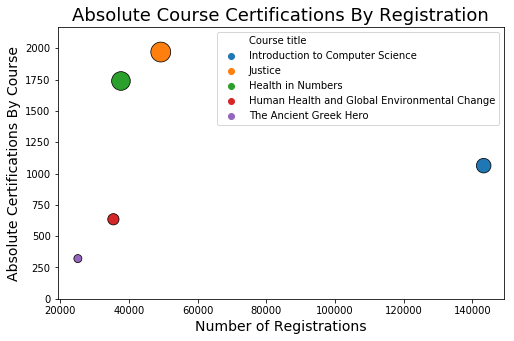

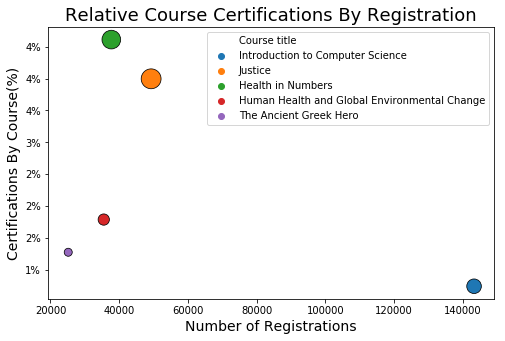

In [25]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8,5))
#Absolute and Relative course certifications by course registration
x = plot_df1['Number of registrations']
y = plot_df1['Number of certifications']
s = plot_df1['Number of certifications'] /5
colors = ['orange','blue','hotpink','yellow','lime']

p1 = sns.scatterplot(x, y, s=s, hue=plot_df1['Course title'],edgecolor='black')
p1.set_title('Absolute Course Certifications By Registration',fontsize=18)
p1.set_ylabel('Absolute Certifications By Course',fontsize=14)
p1.set_xlabel('Number of Registrations',fontsize=14)
p1.set_ylim(0, max(y)+200)
plt.show()

plt.figure(figsize=(8,5))
p2 = sns.scatterplot(x, plot_df1['% certified'], s=s, hue=plot_df1['Course title'],edgecolor='black')
p2.set_title('Relative Course Certifications By Registration',fontsize=18)
p2.set_ylabel('Certifications By Course(%)',fontsize=14)
p2.set_xlabel('Number of Registrations',fontsize=14)
p2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
plt.show()

In [38]:
#Countries by registration
country = df['Country'].value_counts().reset_index()
country.columns=['Country','Number of registrations']

#Countries by certifications
plot_df2 = df.loc[df['Certified'] =='Yes',['Country']]
plot_df2 = plot_df2.value_counts().reset_index()
plot_df2.columns = ['Country','Number of certifications']

plot_df2 = pd.merge(country,plot_df2, how='inner',on='Country')
percent_certified = (plot_df2['Number of certifications']/plot_df2['Number of registrations'])*100
plot_df2['% certified'] = percent_certified
plot_df2.head()

,Country,Number of registrations,Number of certifications,% certified
0,United States,85675,1302,2
1,Unknown/Other,60849,30,0
2,India,27255,910,3
3,Other Europe,16608,627,4
4,Other Africa,11463,352,3


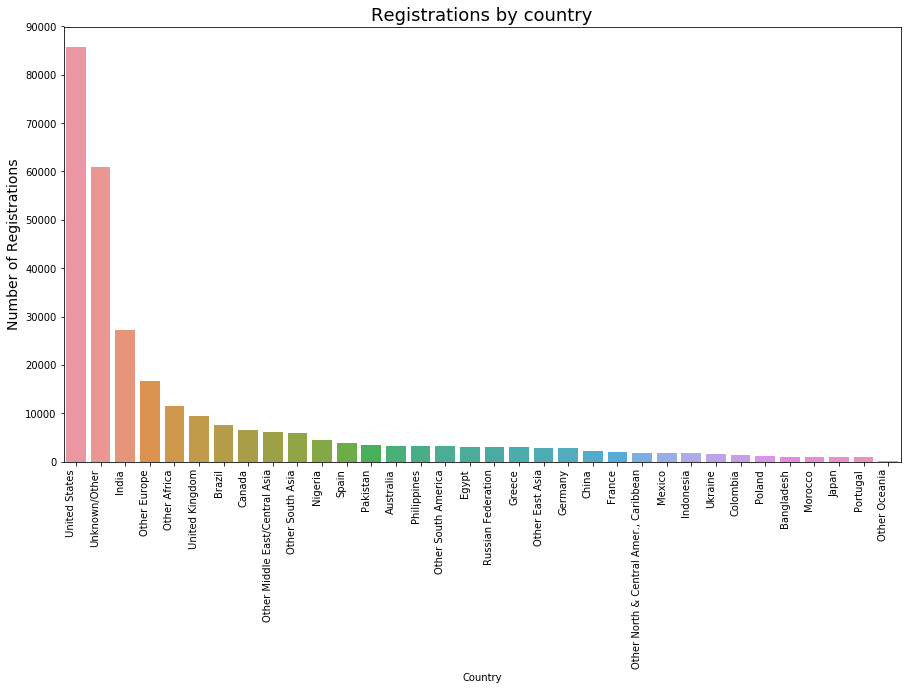

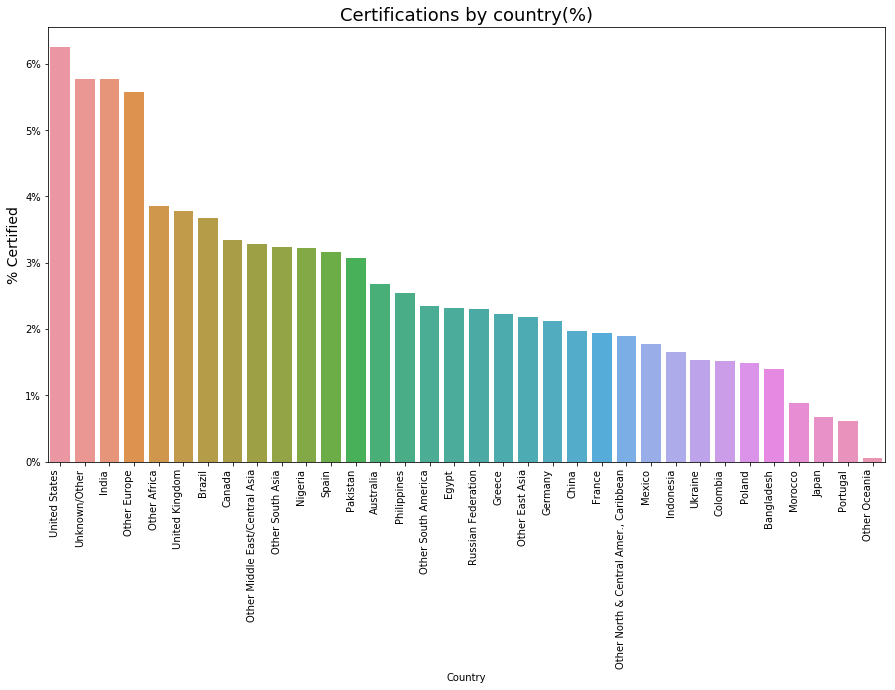

In [40]:
#Plot this data
#Course registrations by country
fig, ax = plt.subplots(figsize=(15,8))
p3 = sns.barplot(x='Country',y="Number of registrations", data=plot_df2)
p3.set_title('Registrations by country',fontsize=18)
p3.set_ylabel('Number of Registrations', fontsize=14)
p3.set_xticklabels(p3.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


#Certifications by country
data= plot_df2.sort_values('% certified',ascending=False)

fig, ax = plt.subplots(figsize=(15,8))
p4 = sns.barplot(x='Country',y='% certified', data=data)
p4.set_title('Certifications by country(%)',fontsize=18)
p4.set_ylabel('% Certified', fontsize=14)
p4.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
p4.set_xticklabels(p3.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

We see that about 73% of the studnets who completed the courseware and received certification already have a bachelor's, master's or doctorate degree.This shows that students accessing the courseware regard it merely as a resource to fill in gaps or perhaps suplement skills they already learnt in a four year traditional institution.

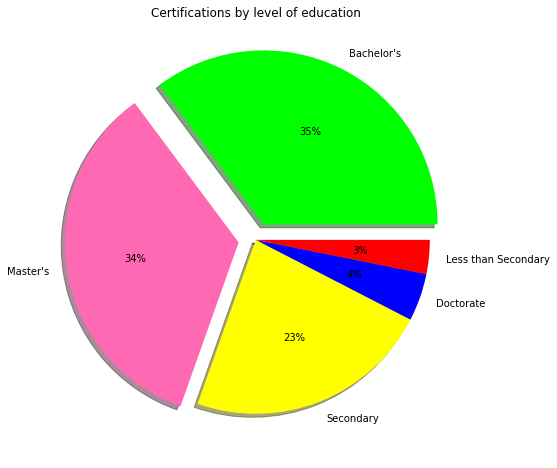

In [28]:
#Filter certification by level of education
LoE_certified  = mooc_data[(mooc_data['Certified'] == 'Yes')]

#Give me the counts of certification by level of education
LoE = LoE_certified['Education'].value_counts()
LoE = LoE.reset_index()
LoE

#plot this data
plt.figure(figsize=(8,8))
colors=['lime','hotpink','yellow','blue','red']
explode= (0.1,0.1,0.0,0.0,0.0)
labels = LoE['index']
plt.pie(LoE['Education'],autopct='%1.0f%%', colors=colors, shadow=True, explode = explode,labels=labels)
plt.title('Certifications by level of education')
plt.show()

In [29]:
#Registration by gender
gender_registered = mooc_data.groupby(['Gender']).count()['Registered']
print(gender_registered)
g = gender_registered.reset_index()

#Certification by gender
gender_certified = mooc_data.loc[mooc_data['Certified']=='Yes']
gender_certified = gender_certified['Gender'].value_counts()
g2 = gender_certified.reset_index()
g2.columns =['Gender','Certified']

#Merge registration by gender and certification by gender

merged = pd.merge(g, g2, how='inner',on='Gender')
percent_certified = (merged['Certified']/merged['Registered']) *100
merged['% Certified'] = percent_certified
merged

Gender
f     92397
m    198546
o         5
Name: Registered, dtype: int64


,Gender,Registered,Certified,% Certified
0,f,92397,2064,2
1,m,198546,3664,2


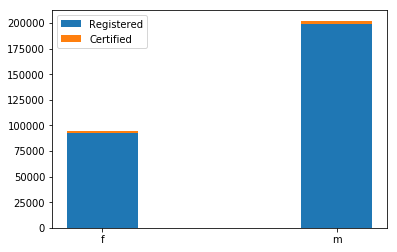

In [30]:
#Plot this data
labels = merged['Gender']
registered = merged['Registered']
certified = merged['Certified']
width = 0.30

fig, ax = plt.subplots()

ax.bar(labels, registered, width,  label='Registered')
ax.bar(labels, certified, width, label='Certified',bottom=registered)
ax.legend()

### Reasons for low certification

In [37]:
#Number of interactive days with the courseware and out of these days how may were certified
interactive_days = mooc_data['Ndays_act'].value_counts()

#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group number of days students interacted with the courseware and the number of certifications
interactive_days_certified = certified.groupby(['Ndays_act']).count()['Certified']
interactive_days_certified = interactive_days_certified.reset_index()
interactive_days_certified.head(10)

#Average number of days students need to interact with courseware to receive certification
total_interactions = interactive_days_certified['Ndays_act'].sum()
average = round(total_interactions/len(interactive_days),2)

#Plot this data


In [32]:
#Those who explored (acessed more than 50% of the courseware) who received certifications

#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group by those who explored courseware and number of certifications
more_than_50percent = certified.groupby(['Explored']).count()['Certified']
more_than_50percent= more_than_50percent.reset_index()
more_than_50percent

,Explored,Certified
0,No,472
1,Yes,5256


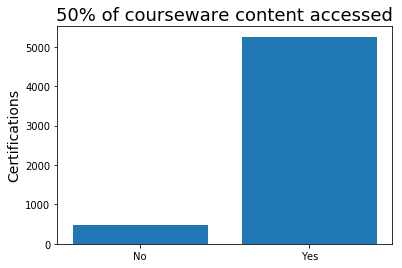

In [33]:
x = more_than_50percent['Explored']
y = more_than_50percent['Certified']
p5= plt.bar(x, y)
plt.title('50% of courseware content accessed',fontsize=18)
plt.ylabel('Certifications',fontsize=14)
plt.show()

In [34]:
#Number of chapters of the course and how many were certified
number_of_chapters = mooc_data['Nchapters'].value_counts()

#Filter out only those who were certified
certified = mooc_data[(mooc_data["Certified"] == 'Yes')]

#Group number of days students interacted with the courseware and the number of certifications
number_of_chapters_certified = certified.groupby(['Nchapters']).count()['Certified']
number_of_chapters_certified = number_of_chapters_certified.reset_index()
number_of_chapters_certified.head()

#Average number of courseware chapters needed to receive certification
total_chapters = number_of_chapters_certified['Nchapters'].sum()
average = round(total_chapters/len(number_of_chapters), 2)
print(average)


17.0


In [35]:
#Plot this data

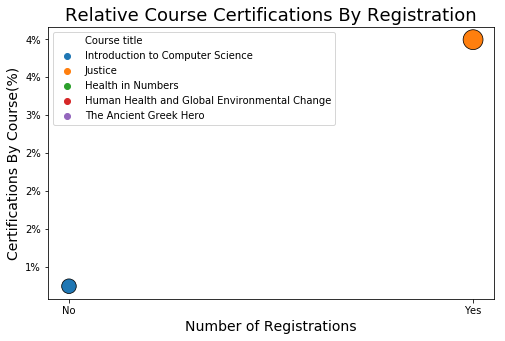

In [36]:

plt.figure(figsize=(8,5))
p5 = sns.scatterplot(x, plot_df1['% certified'], s=s, hue=plot_df1['Course title'],edgecolor='black')
p5.set_title('Relative Course Certifications By Registration',fontsize=18)
p5.set_ylabel('Certifications By Course(%)',fontsize=14)
p5.set_xlabel('Number of Registrations',fontsize=14)
p5.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}%"))
plt.show()